# 1. Data exploration

## Summary
This notebook focuses on the initial analysis of the raw acoustic data used for the UAV detection datasets.

To-do list:
- Inspection of the dataset composition (number of samples, duration, labels);
- Visualization of waveforms, to observe amplitude and temporal patterns;
- Generation and analysis of spectograms to explore frequency content;
- Compute basic descriptive statistics (e.g., mean duration, sampling rate);
- Identification of potential data quality issues (e.g., noise, silent segments, imbalance).

## Imports

In [2]:
# pip install numpy == 2.2.0
# pip install matplotlib
# pip install librosa
# pip install pandas

import os
import numpy as np
import matplotlib.pyplot as plt
import librosa
import librosa.display
import pandas as pd
from IPython.display import Audio

## Paths and Labels

In [4]:
# Path to Binary_Drone_Audio
BASE_PATH = "./data/DroneAudioDataset-master/Binary_Drone_Audio"
LABELS = {"unknown": 0, "yes_drone": 1}

## Number of files per label

In [5]:
for label_name in LABELS:
    folder = os.path.join(BASE_PATH, label_name)
    files = [f for f in os.listdir(folder) if f.endswith(".wav")]
    print(f"{label_name}: {len(files)} files")

unknown: 10372 files
yes_drone: 1332 files


## Ploat raw waveform


Label: unknown
Sample rate: 16000, Duation: 1.02s


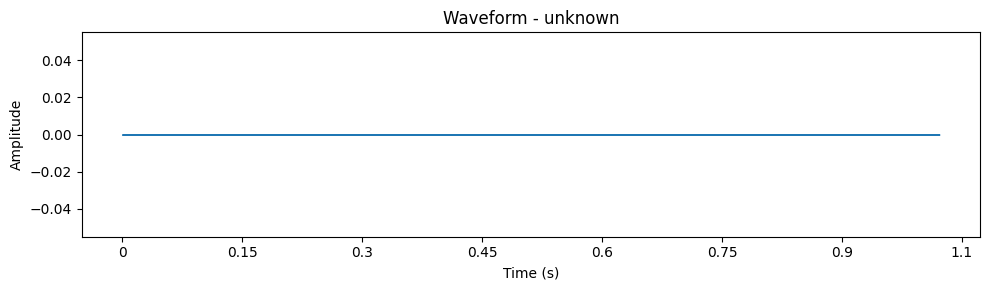


Label: yes_drone
Sample rate: 16000, Duation: 1.02s


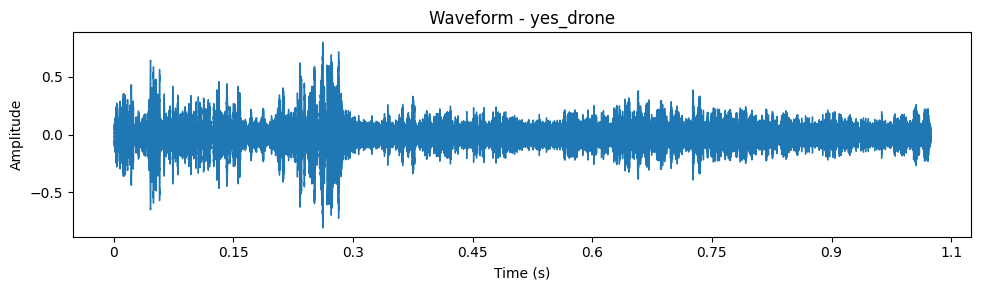

In [8]:
for label_name in LABELS:
    folder = os.path.join(BASE_PATH, label_name)
    file_path = os.path.join(folder, os.listdir(folder)[0])
    y, sr = librosa.load(file_path, sr= None)

    print(f"\nLabel: {label_name}")
    print(f"Sample rate: {sr}, Duation: {len(y)/sr:.2f}s")

    plt.figure(figsize=(10,3))
    librosa.display.waveshow(y, sr= sr)
    plt.title(f"Waveform - {label_name}")
    plt.xlabel("Time (s)")
    plt.ylabel("Amplitude")
    plt.tight_layout()
    plt.show()

## Analysis of duration, silence and amplitude

In [9]:
audio_stats = []

for label_name in LABELS:
    folder = os.path.join(BASE_PATH, label_name)
    for file_name in os.listdir(folder):
        if file_name.endswith(".wav"):
            path = os.path.join(folder, file_name)
            y, sr = librosa.load(path, sr= None)
            duration = len(y) / sr
            mean_amp = np.mean(np.abs(y))
            zero_crossings = sum(librosa.zero_crossings(y, pad= False))
            audio_stats.append({
                "label": label_name,
                "filename": file_name,
                "duration": duration,
                "mean_amplitude": mean_amp,
                "zero_crossings": zero_crossings
            })

df_stats = pd.DataFrame(audio_stats)

## Duration and Amplitude distributions

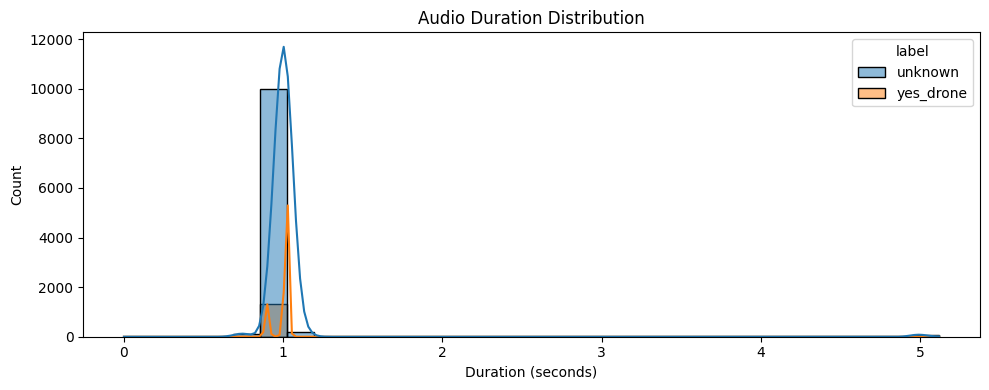

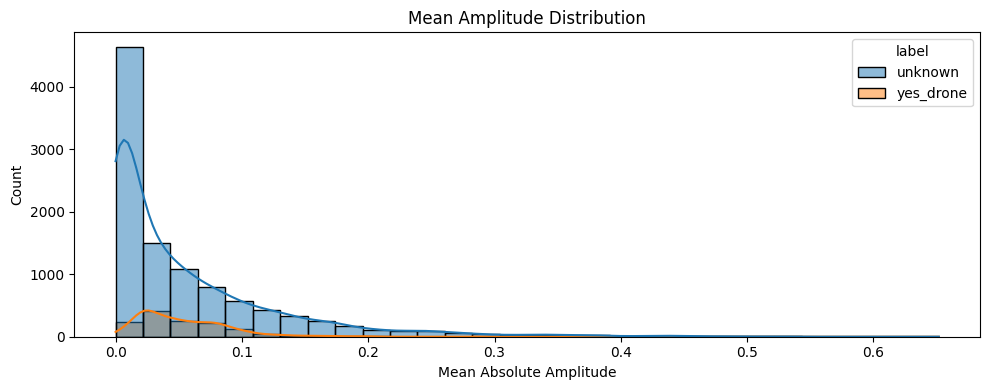

In [13]:
# pip install seabon
import seaborn as sns

# Plot Duration distribution
plt.figure(figsize= (10, 4))
sns.histplot(data= df_stats, x= "duration", hue= "label", kde= True, bins= 30)
plt.title("Audio Duration Distribution")
plt.xlabel("Duration (seconds)")
plt.tight_layout()
plt.show()

# Plot Amplitude distribution
plt.figure(figsize= (10, 4))
sns.histplot(data= df_stats, x= "mean_amplitude", hue = "label", kde= True, bins= 30)
plt.title("Mean Amplitude Distribution")
plt.xlabel("Mean Absolute Amplitude")
plt.tight_layout()
plt.show()